# Deutsch-Josza algorithm 



1. Deutsch's algorithm tries to find if function $f(x)$ is constant or balanced for single input bits. This means that $x = \{0, 1\}$ for constant or balanced function $f(x)$ 

2. Deutsch-Josza algorithm on the other hand generalizes the task of finding if a function is constant or balanced for multiple input bits. Instead of single input bit in case of Deutsch algorithm, we input string of bits in Deutsch-Josza algorithm for constant or balanced function $f(x)$, where $x = \{0, 1\}^n$. $\{0, 1\}^n$ means all possible bit-strings of length $n$. Given a $n$-bit function $f$, such that $f:{\{0, 1\}^n} {\rightarrow} {0, 1}$, we need to find if the function is constant or balanced 

3. Deutsch-Josza algorithm is a generalised form of Deutsch algorithm and is a natural sequence to the Deutsch algorithm.

4. Since the input is a n-bit string which means there are $2^{n-1}$ possible inputs which will lead to $O(2^n)$ complexity classically to solve the problem of determining if a function $f(x)$ is constant ot balanced. 

5. Deutsch-Josza algorithm will determine the type of function (constant or balanced) in just one query leading to $O(1)$ complexity. There there is a big advantange using quantum computer to perform the task. 

In [1]:
from qiskit import *
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
import numpy as np


%matplotlib inline

# Step 1: Initial states of all the qubits except the last qubit to |0> state. Initiate the last qubit to |1> state. Apply Hadamard gates to all qubits from both registers x and y 

In [2]:
# for x having three bits and y has one bit the quantum circuit has total 4 qubits
n = 4 # num. of qubits

def prepare_state(n):
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    for qubit in range(0,n+1):
        qc.h(qubit)

    return qc
qc = prepare_state(n)
qc.barrier()
display(qc.draw('mpl'))


# Step 2: Apply a quantum oracle (unitary transformation $U_f$) to the circuit: $|x>|y> {\xrightarrow{U_f}} |x>|y{\oplus}f(x)>$

In [3]:
def Oracle(n, qc, case):
    if case == "balanced":
        for qubit in range(n):
            qc.cx(qubit, n)
    return qc 

qc = Oracle(n, qc, "balanced")
qc.barrier()
display(qc.draw('mpl'))   

# Step 3: Apply hadamard Gates to all qubits in the first register (all qubits holding x)

In [4]:
def post_oracle_state(n, qc):
    for qubit in range(n):
        qc.h(qubit)
    return qc

qc = post_oracle_state(n, qc)
qc.barrier()
display(qc.draw('mpl'))     

# Step 4 Measure all qubits in register x. If we get all 0s then we have constant function or else we have balanced function

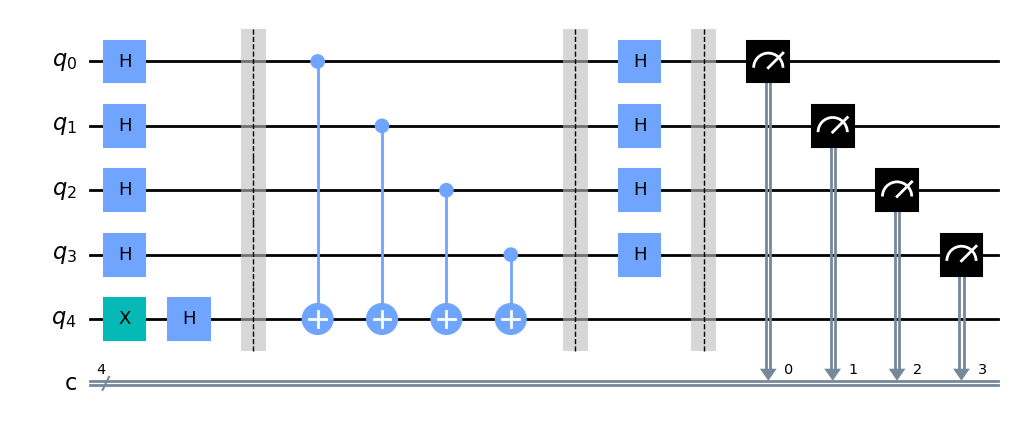

In [5]:
for j in range(n):
    qc.measure(j, j)


display(qc.draw('mpl'))       

/Users/priyabratasenapati/opt/miniconda3/envs/QuantumML2/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/priyabratasenapati/opt/miniconda3/envs/QuantumML2/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


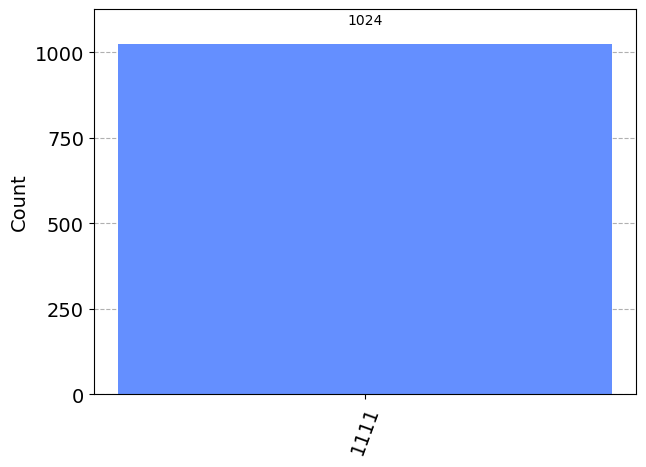

In [6]:
counts = execute(qc, backend = Aer.get_backend('aer_simulator'), shots = 1024).result().get_counts()
plot_histogram(counts)

# Putting it all together


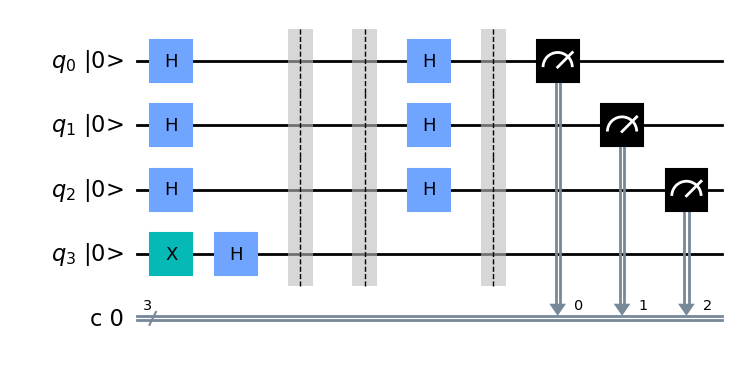

In [7]:
from qiskit import *
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
import numpy as np


# Step 1
# for x having three bits and y has one bit the quantum circuit has total 4 qubits
n = 3 # num. of qubits

def prepare_state(n):
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    for qubit in range(0,n+1):
        qc.h(qubit)

    return qc
qc = prepare_state(n)
qc.barrier()

# Step 2

def Oracle(n, qc, case):
    # balanced because with multiple cx gates, we can get 0 or 1 as the target qubit depending on the number of 1's state in source qubits 
    # when just the CX gate(s) is measured. The parity decides what should be the value of the target qubit. This is why CX gate is a balanced function 
    if case == "balanced":
        for qubit in range(n):
            qc.cx(qubit, n)
    # In case of constant function, we get only a single value for f(x) no matter the input.
    # Choice is given by picking a random integer (0 or 1). If choice is 1 then we do X gate on second register qubit(s) 
    elif case == "constant":
        choice = np.random.randint(2)
        if choice == 1:
            qc.x(n)

    return qc 

qc = Oracle(n, qc, "constant")
qc.barrier()

# Step 3
def post_oracle_state(n, qc):
    for qubit in range(n):
        qc.h(qubit)
    return qc

qc = post_oracle_state(n, qc)
qc.barrier()
# display(qc.draw('mpl'))    

# Step 4 
for j in range(n):
    qc.measure(j, j)
# qc.measure_all()


display(qc.draw('mpl', initial_state=True))
counts = execute(qc, backend = Aer.get_backend('aer_simulator'), shots = 1024).result().get_counts()
plot_histogram(counts)   

# Putting it all together in form of a class for Deutsch -Josza algorithm and executing using Aer simulator

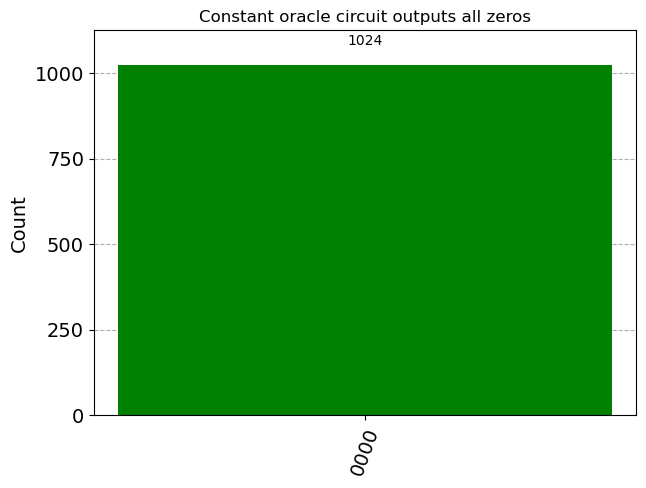

In [8]:
from qiskit import *
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
import numpy as np


class Deutsch_Josza_Algorithm:
    def __init__(self, n, case, shots):
        self.n = n
        self.case = case
        self.qc = QuantumCircuit(n+1, n)
        self.shots = shots

    def prepare_state(self):
        self.qc.x(self.n)
        for qubit in range(0,self.n+1):
            self.qc.h(qubit)
        return self.qc
    
    def Oracle(self):
    # balanced because with multiple cx gates, we can get 0 or 1 as the target qubit depending on the number of 1's state in source qubits 
    # when just the CX gate(s) is measured. The parity decides what should be the value of the target qubit. This is why CX gate is a balanced function 
        if self.case == "balanced":
            for qubit in range(self.n):
                self.qc.cx(qubit, self.n)
        # In case of constant function, we get only a single value for f(x) no matter the input.
        # Choice is given by picking a random integer (0 or 1). If choice is 1 then we do X gate on second register qubit(s) 
        elif self.case == "constant":
            choice = np.random.randint(2)
            if choice == 1:
                self.qc.x(self.n)
            elif choice != 1:
                for qubit in range(self.n):
                    self.qc.i(qubit)    
        return self.qc 
    
    def post_oracle_state(self):
        for qubit in range(self.n):
            self.qc.h(qubit)
        return self.qc
    
    def measure_circuit(self):
        for j in range(self.n):
            self.qc.measure(j,j)
        return self.qc
    
    def counts_histogram(self):
        counts = execute(self.qc, backend = Aer.get_backend("aer_simulator"), shots = self.shots).result().get_counts()
        return self.qc, counts


    def execute_circuit(self):
        # Step 1
        self.qc = self.prepare_state()
        self.qc.barrier()

        # Step 2
        self.qc = self.Oracle()
        self.qc.barrier()

        # Step 3
        self.qc = self.post_oracle_state() 
        self.qc.barrier()

        # Step4
        self.qc = self.measure_circuit() 

        # executing the circuit and resturning counts with histogram
        self.qc, counts = self.counts_histogram()

        return self.qc, counts

           


DJ_Circ_balanced = Deutsch_Josza_Algorithm(4, "balanced", shots = 1024)
balanced_circ, counts = DJ_Circ_balanced.execute_circuit()
display(balanced_circ.draw('mpl', initial_state=True))
display(plot_histogram(counts, title="Balanced oracle circuit outputs a states except all zeros"))


DJ_Circ_constant = Deutsch_Josza_Algorithm(4, "constant", shots = 1024)
constant_circ, counts = DJ_Circ_constant.execute_circuit()
display(constant_circ.draw('mpl', initial_state=True))
display(plot_histogram(counts, title="Constant oracle circuit outputs all zeros",color='g' ))
